# Mission 1. Netfilx and Code

## Mandatory Part

- **한국 작품**은 총 얼마나 있는가?
  - country column을 기준으로 한다.
  - "South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)

In [33]:
netflix = pd.read_csv("./netflix_titles.csv", index_col=["show_id"])
netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [17]:
# groupby -> count를 통해 나라별 작품 수를 세고,
# "South Korea"의 "title"을 구한다.

netflix.groupby("country").count().loc["South Korea", "title"]

183

- 183작품이 있다.

### Bonus Part
- 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?
  - country column을 기준으로 한다.
  - **단일 국가**인 경우를 기준으로 결과를 구해보자.

In [34]:
# 다음에 쓸 str.contains는 기본적으로 True, False값을 반환하지만
# 결측치에 대해서는 NaN을 반환한다.
# 이 값을 인덱스로 쓸 것인데, NaN이 있으면 오류가 나서
# 미리 결측치가 있는 행을 드랍한다.

netflix_drop = netflix.dropna(subset=["country"])

In [59]:
# ","를 포함하고 있으면 False, 아니면 True인 인덱스를 생성
idx = netflix_drop["country"].str.contains(",").map(lambda x: not x)

# 이 인덱스로 데이터를 갱신한다.
netflix_drop = netflix_drop[idx]

In [68]:
# 위 데이터를 나라별로 groupby하여 수를 세고,
# idxmax로 가장 많은 국가를 구하고
# loc으로 작품 수를 구한다.

nf_group = netflix_drop.groupby("country").count()
max_country = nf_group["title"].idxmax()
how_many = nf_group.loc[max_country, "title"]

In [71]:
print(f"가장 많은 작품이 올라간 국가 : {max_country}")
print(f"작품 수 : {how_many}")

가장 많은 작품이 올라간 국가 : United States
작품 수 : 2555


- 미국이 가장 많은 작품을 올렸고, 그 수는 2555개이다.

# Mission 2. 가즈아!

### Mandatory Part
- 2016.6 ~ 2017.6 기간의 **5-MA(Moving Average) 비트코인 가격 그래프**를 그려주세요.
  - 선의 색깔은 **노란색(#f2a900)** 으로 해야합니다.
  - x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
  - 이동평균의 기준은 `Open` Column으로 계산합니다.
  - 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

In [70]:
# 원본 데이터에서 Date, Open 행만 가져온 뒤, Date행을 인덱스로 지정한다.
# 그리고 인덱스를 기준으로 정렬한다.

BTC = pd.read_csv("./BitCoin.csv", index_col="Date", parse_dates=True, usecols=["Date", "Open"])
BTC.sort_index(inplace=True)
BTC.head()

,Open
Date,
2013-01-05,139.00
2013-01-06,128.81
2013-01-07,97.51
2013-01-08,106.21
2013-01-09,135.14


In [103]:
# 2016년 6월부터 2017년 6월까지의 데이터의 5_MA를 구한다(SMA).

BTC2 = BTC.loc["2016-06-01":"2017-06-30"].rolling(5).mean()

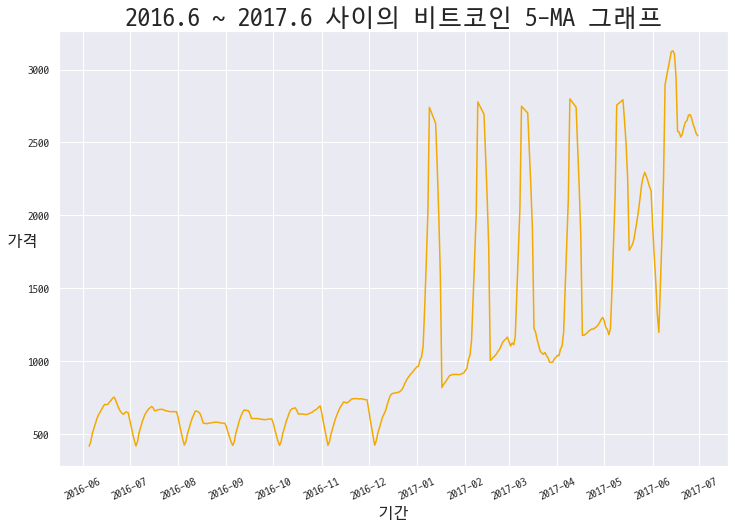

In [217]:
import matplotlib.dates as md


plt.figure(figsize=(12, 8))
plt.plot(BTC2, color="#f2a900")
ax = plt.gca()

# X축 설정
xfmt = md.DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(xfmt)
xticks = pd.date_range("2016-06", "2017-07", freq="MS")
plt.xticks(xticks, rotation=25)
plt.xlabel("기간", fontsize=16)

# Y축 설정
plt.ylabel("가격", fontsize=16, rotation=0)

# 제목 및 기타 설정
plt.title("2016.6 ~ 2017.6 사이의 비트코인 5-MA 그래프", fontsize=25)
plt.grid(True)
plt.show()

### Bonus Part
- 위의 비트코인 데이터와 더불어 이더리움 데이터도 활용해 2016.6 ~ 2017.6 기간에 해당하는 **비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에** 그려주세요.
  - 선의 색깔은 비트코인 : **노란색(#f2a900)**, 이더리움 : **검은색(#3c3c3d)** 으로 해야합니다.
  - x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
  - 이동평균의 기준은 `Open` Column으로 계산합니다.
  - 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

In [27]:
BTC = pd.read_csv("./BitCoin.csv", index_col="Date", parse_dates=True, usecols=["Date", "Open"]).sort_index()
ETH = pd.read_csv("./ETH_day.csv", index_col="Date", parse_dates=True, usecols=["Date", "Open"]).sort_index()
BTC = BTC.loc["2016-06-01":"2017-06-30"].rolling(5).mean()
ETH = ETH.loc["2016-06-01":"2017-06-30"].rolling(5).mean()

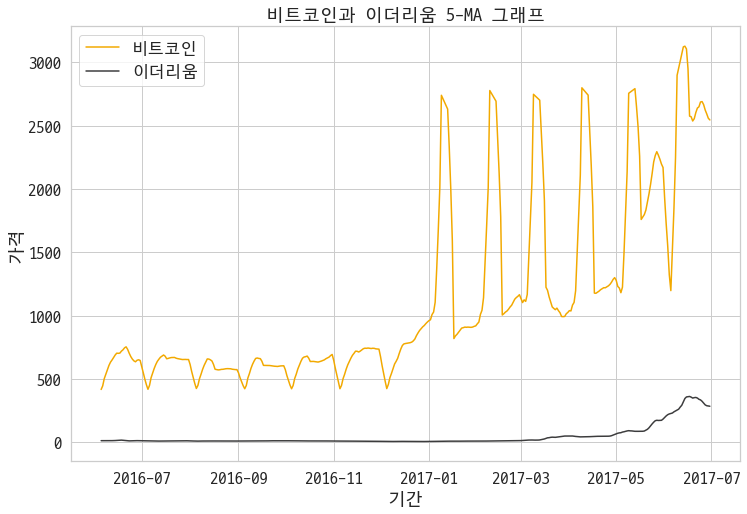

In [63]:
sns.set(style="whitegrid", font="D2coding", font_scale=1.5)
plt.figure(figsize=(12, 8))

# seaborn에 color를 적용하려면 data가 pd.Series여야 한다고 함
# 그래서 data에 각 행을 넘겨주어 Series로 취급되게 했다.
# DataFrame으로 컬러를 적용하려면 color 대신에 palette를 쓰면 된다고 나와있는데,
# 원하는 색으로 컬러를 지정하는 방법은 찾지 못해서 series를 사용함

ax1 = sns.lineplot(data=BTC["Open"], color="#f2a900", label="비트코인")
ax2 = sns.lineplot(data=ETH["Open"], color="#3c3c3d", label="이더리움")

ax1.set_title("비트코인과 이더리움 5-MA 그래프")
ax1.set(xlabel="기간", ylabel="가격")

plt.show()